In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random
import seaborn.objects as so

In [ ]:
df = pd.read_csv("/content/Crop Production data.csv")

In [ ]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [ ]:
df.shape

(246091, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


1)We can observe there are some missing values in Production column.

In [ ]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


2)We don't find any unwanted values in at extremes(Zero in production column is accepted).

In [ ]:
df["Production"].isnull().sum()

3730

In [ ]:
df["Crop"].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
246086    False
246087    False
246088    False
246089    False
246090    False
Name: Crop, Length: 246091, dtype: bool

In [ ]:
b = []
for i in df.index:
  if pd.isna(df.loc[i,"Production"]):
      b.append(i)

b

[46,
 51,
 623,
 630,
 698,
 723,
 1153,
 1317,
 1419,
 1423,
 1424,
 1536,
 1610,
 2043,
 2210,
 2212,
 2219,
 2315,
 2350,
 2352,
 2489,
 2501,
 2661,
 2780,
 3180,
 3285,
 3446,
 3499,
 3560,
 3667,
 4009,
 4047,
 4279,
 4398,
 4448,
 4673,
 4729,
 4731,
 4971,
 5457,
 5648,
 5800,
 5943,
 5980,
 6050,
 6266,
 6354,
 6543,
 6566,
 6707,
 7044,
 7116,
 7245,
 7394,
 7395,
 7901,
 7971,
 8138,
 8625,
 8756,
 9008,
 9083,
 9196,
 9215,
 9275,
 9452,
 9586,
 9628,
 9793,
 11285,
 16241,
 19096,
 19614,
 20557,
 26120,
 26147,
 28181,
 30143,
 31017,
 31799,
 32109,
 32681,
 33085,
 35648,
 42685,
 43039,
 44385,
 45912,
 46054,
 46071,
 46101,
 46121,
 46202,
 46270,
 46745,
 46763,
 46812,
 46887,
 46927,
 46962,
 46999,
 47125,
 47148,
 47149,
 47150,
 47151,
 47152,
 47153,
 47154,
 47155,
 47156,
 47157,
 47158,
 47159,
 47161,
 47162,
 47163,
 47164,
 47165,
 47166,
 47167,
 47168,
 47169,
 47170,
 47171,
 47172,
 47173,
 47174,
 47175,
 47176,
 47207,
 47220,
 47233,
 47250,
 4725

In [ ]:
sum(df.duplicated() == True)

0

<ipython-input-11-c9b9061ef955>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production"])


<Axes: xlabel='Production', ylabel='Density'>

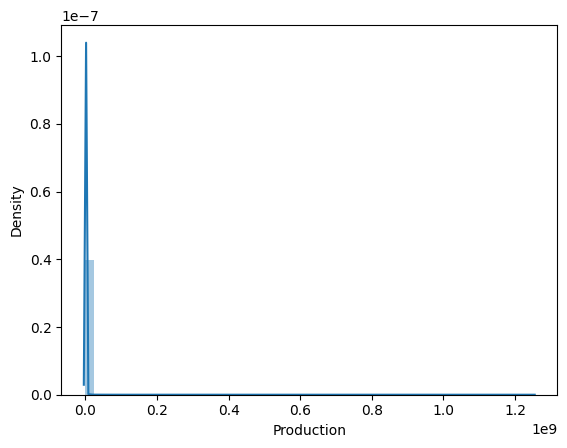

In [ ]:
sns.distplot(df["Production"])

<Axes: xlabel='Production', ylabel='Count'>

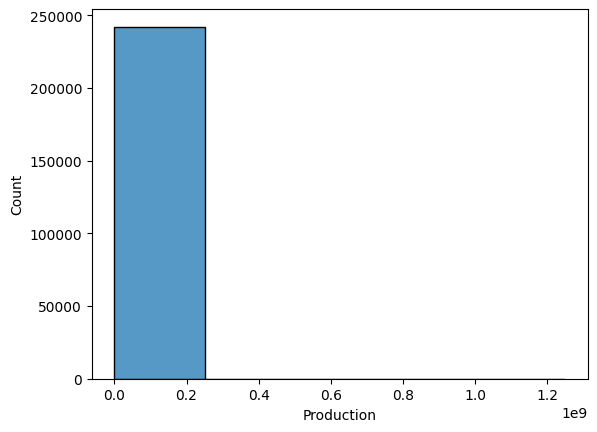

In [ ]:
sns.histplot(data = df, x = "Production", bins = 5)

In [ ]:
a = df["Production"].mean()
a

582503.4422509808

<Axes: ylabel='Production'>

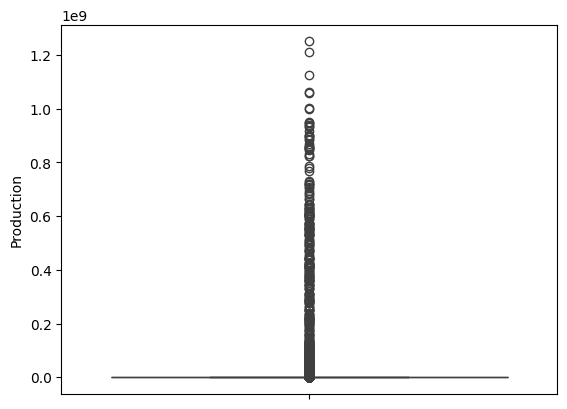

In [ ]:
sns.boxplot(df["Production"])

As the data is huge and range of productioon column is very large we are not able get charts exactky but we can observe that if crop area is high production is also high that is, proportional.

In [ ]:
df["P/A"] = df['Production']/df['Area']     ###  P/A = Production per Unit Area
df['P/A']

0          1.594896
1          0.500000
2          3.147059
3          3.642045
4          0.229167
            ...    
246086     2.617647
246087     0.738437
246088    50.154321
246089     2.141848
246090     0.502857
Name: P/A, Length: 246091, dtype: float64

In [ ]:
df.head(6)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,P/A
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0,3583.223250


<ipython-input-17-05624c58172a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['P/A'])


<Axes: xlabel='P/A', ylabel='Density'>

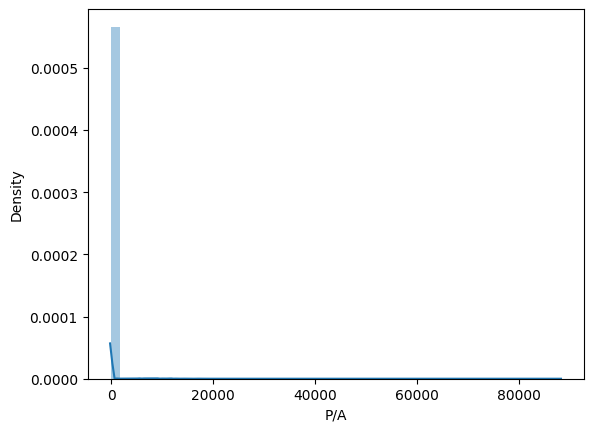

In [ ]:
sns.distplot(df['P/A'])

<Axes: ylabel='P/A'>

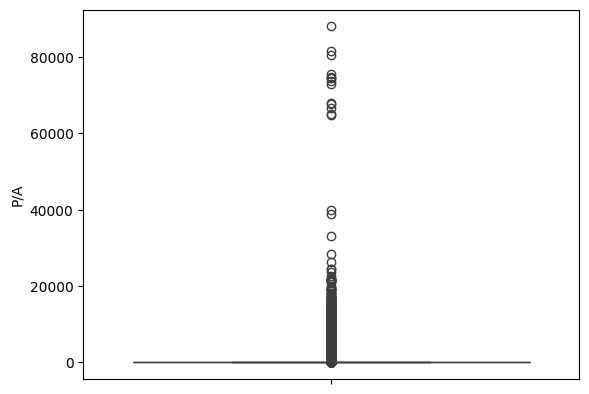

In [ ]:
sns.boxplot(df["P/A"])

<Axes: xlabel='Production', ylabel='P/A'>

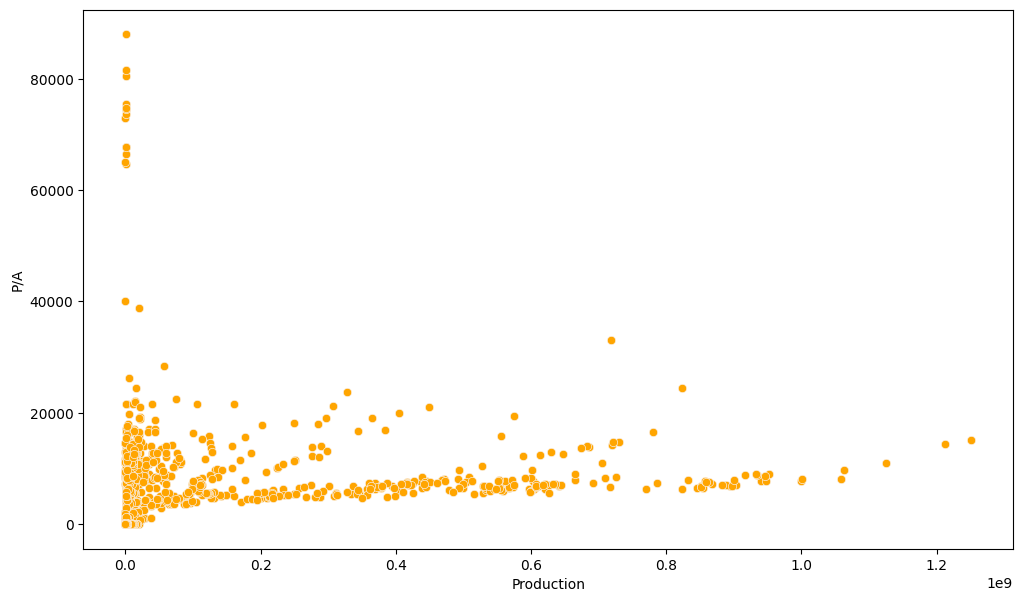

In [ ]:
plt.figure(figsize = (12,7))
sns.scatterplot(data = df, x= 'Production', y= 'P/A', color = 'orange', edgecolor = 'linen')

In [ ]:
def outliers(data,cl):
  Q1 = np.nanpercentile(data[cl],25)
  Q3 = np.nanpercentile(data[cl],75)
  IQR = Q3-Q1
  lower = Q1 - IQR * 1.5
  upper = Q3 + IQR * 1.5
  print(f"Q1 = {Q1}, Q3 = {Q3} \nIQR = {IQR} \nlower = {lower}, upper = {upper}")
  ls = data.index[(data[cl] < lower) | (data[cl] > upper)]
  return ls

In [ ]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production', 'P/A'],
      dtype='object')

In [ ]:
index_list =[]
index_list.extend(outliers(df,'P/A'))
index_list

Q1 = 0.5135135135135135, Q3 = 2.3554502369668247 
IQR = 1.841936723453311 
lower = -2.249391571666453, upper = 5.118355322146791


[5,
 14,
 20,
 23,
 26,
 29,
 32,
 38,
 41,
 45,
 47,
 50,
 52,
 57,
 62,
 73,
 76,
 77,
 78,
 82,
 84,
 87,
 88,
 89,
 94,
 96,
 100,
 103,
 105,
 107,
 108,
 109,
 110,
 112,
 118,
 124,
 126,
 127,
 128,
 131,
 134,
 138,
 141,
 144,
 148,
 151,
 154,
 158,
 161,
 164,
 166,
 168,
 169,
 170,
 171,
 174,
 177,
 179,
 181,
 182,
 184,
 186,
 192,
 197,
 198,
 200,
 201,
 202,
 217,
 251,
 256,
 286,
 287,
 300,
 319,
 320,
 328,
 329,
 331,
 332,
 333,
 335,
 348,
 363,
 365,
 375,
 377,
 378,
 392,
 407,
 409,
 417,
 419,
 420,
 422,
 425,
 426,
 427,
 431,
 432,
 433,
 434,
 435,
 449,
 465,
 467,
 475,
 476,
 477,
 478,
 479,
 482,
 483,
 484,
 487,
 488,
 489,
 490,
 492,
 503,
 518,
 520,
 527,
 528,
 530,
 531,
 534,
 545,
 559,
 561,
 568,
 569,
 571,
 573,
 575,
 586,
 599,
 601,
 608,
 609,
 611,
 613,
 614,
 624,
 632,
 645,
 657,
 658,
 664,
 665,
 667,
 670,
 681,
 694,
 696,
 704,
 705,
 707,
 709,
 720,
 722,
 734,
 736,
 743,
 745,
 746,
 748,
 750,
 761,
 763,
 765,
 

In [ ]:
len(index_list)

36623

In [ ]:
df2 = df.drop(index_list)          ### data without outliers based on P/A ratio only
df2

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,P/A
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167
...,...,...,...,...,...,...,...,...
246084,West Bengal,PURULIA,2014,Rabi,Wheat,1622.0,3663.0,2.258323
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0,2.617647
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0,0.738437
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0,2.141848


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209468 entries, 0 to 246090
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     209468 non-null  object 
 1   District_Name  209468 non-null  object 
 2   Crop_Year      209468 non-null  int64  
 3   Season         209468 non-null  object 
 4   Crop           209468 non-null  object 
 5   Area           209468 non-null  float64
 6   Production     205738 non-null  float64
 7   P/A            205738 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 14.4+ MB


<ipython-input-26-e25b8c6f2caa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Production'])


<Axes: xlabel='Production', ylabel='Density'>

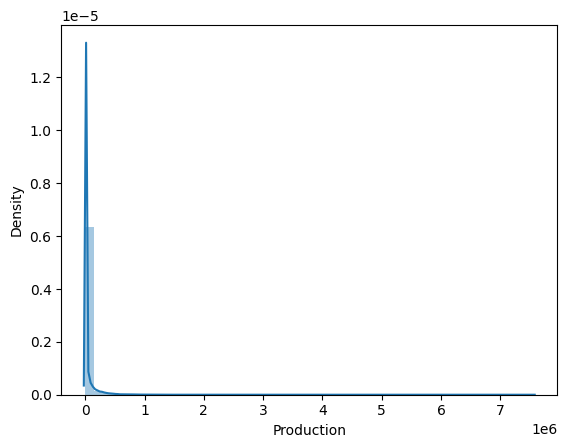

In [ ]:
sns.distplot(df2['Production'])

Using P/A column for removing outliers may not be optimal condition to fill blanks in production column with median of that production data, as we can see graph is completely pointed and skewed so it is better to try with production column for removing columns and fill blanks.   

In [ ]:
index_list2 =[]
index_list2.extend(outliers(df,'Production'))
len(index_list2)

Q1 = 88.0, Q3 = 7023.0 
IQR = 6935.0 
lower = -10314.5, upper = 17425.5


42390

In [ ]:
df3=df.drop(index_list2)
df3

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,P/A
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167
...,...,...,...,...,...,...,...,...
246085,West Bengal,PURULIA,2014,Summer,Maize,325.0,2039.0,6.273846
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0,2.617647
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0,0.738437
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0,50.154321


<ipython-input-29-f89c1dd4431e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['Production'])


<Axes: xlabel='Production', ylabel='Density'>

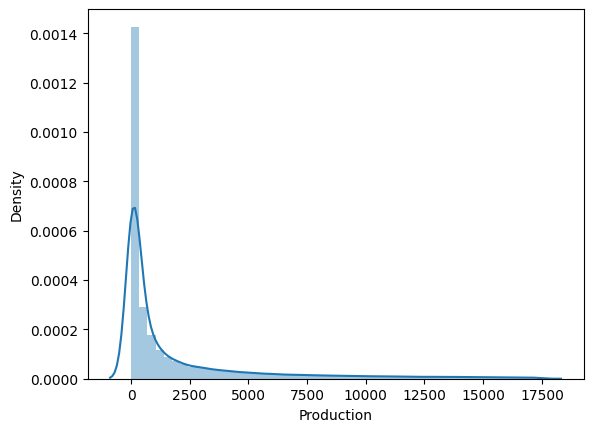

In [ ]:
sns.distplot(df3['Production'])

Using this data, that is, dropping outliers based on production column, is optimal one to fill blanks with median as it is right skewed of production column values.

In [ ]:
med = df3['Production'].median()
med

357.0

In [ ]:
df3['Production'] = df3['Production'].fillna(med)
df3['Production'].isnull().sum()

0

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203701 entries, 0 to 246090
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     203701 non-null  object 
 1   District_Name  203701 non-null  object 
 2   Crop_Year      203701 non-null  int64  
 3   Season         203701 non-null  object 
 4   Crop           203701 non-null  object 
 5   Area           203701 non-null  float64
 6   Production     203701 non-null  float64
 7   P/A            199971 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 14.0+ MB


In [ ]:
df3['P/A'] = df3['P/A'].fillna(df3['Area']/df3['Production'])              ### data without outliers and null values
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203701 entries, 0 to 246090
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     203701 non-null  object 
 1   District_Name  203701 non-null  object 
 2   Crop_Year      203701 non-null  int64  
 3   Season         203701 non-null  object 
 4   Crop           203701 non-null  object 
 5   Area           203701 non-null  float64
 6   Production     203701 non-null  float64
 7   P/A            203701 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 14.0+ MB


Text(0.5, 1.0, 'Scatter Chart of Production and Area')

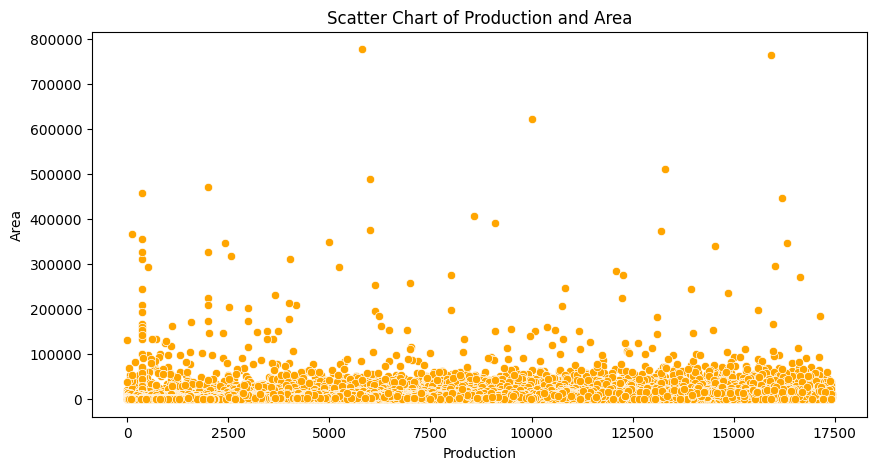

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = df3, x='Production',y='Area', color = 'orange')
plt.title("Scatter Chart of Production and Area")

Text(0.5, 1.0, 'Yearly Production DATA-3')

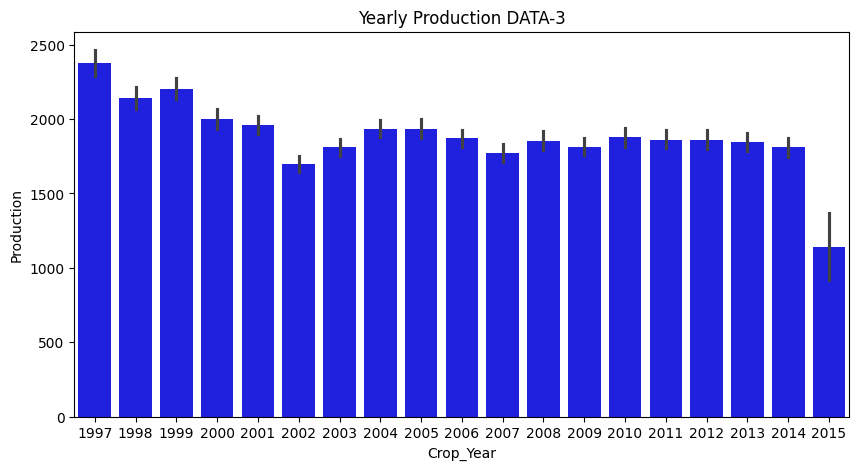

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data = df3, x = 'Crop_Year', y= 'Production', color = 'blue')
plt.title("Yearly Production DATA-3")

We can observe that from 1997 to 2015 there is decrease in production gradually but it can be observed in 2015 production decreased highly, so we need to know the reason whether decrease in production is due to decrease in area or any other reason by analysing yearly area data.

Text(0.5, 1.0, 'Yearly Production Area DATA-3')

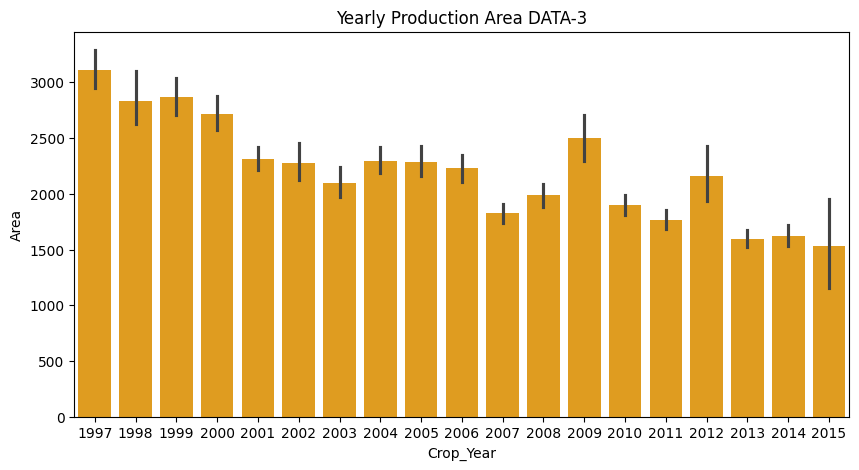

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data = df3, x = 'Crop_Year', y= 'Area', color = 'orange')
plt.title("Yearly Production Area DATA-3")

From area chart we can observe that area has decreased significantly compared to decrease in production, so we can understand that in some cases even if area is highly decreased production is not affected.

Solely from above data we might not get to analyse exact trends by leaving outliers, so it is better to observe trends from complete data with outliers to understand exact trend.

{'whiskers': [<matplotlib.lines.Line2D at 0x7c4d35d755a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c4d35d75ae0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c4d35d75300>],
 'medians': [<matplotlib.lines.Line2D at 0x7c4d35d76020>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c4d35d762c0>],
 'means': []}

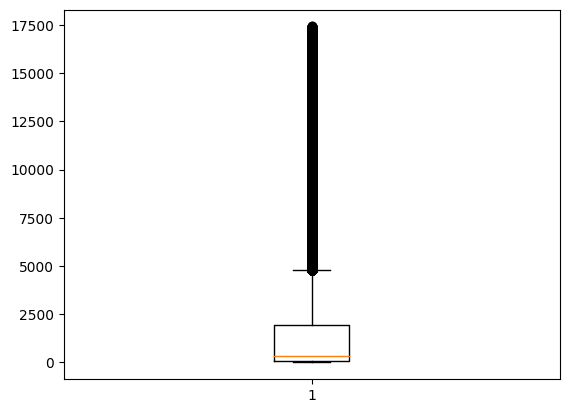

In [ ]:
plt.boxplot(df3['Production'])

In [ ]:
df4 = df.loc[df.index[index_list2]]          ### only outliers data based on production column
df4

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,P/A
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.00,65100000.0,3583.223250
14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.00,64430000.0,3542.056075
23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.00,67490000.0,3700.109649
32,Andaman and Nicobar Islands,NICOBARS,2003,Whole Year,Coconut,18284.74,68580000.0,3750.668590
41,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Coconut,18394.70,52380000.0,2847.559351
...,...,...,...,...,...,...,...,...
245985,West Bengal,PURULIA,2011,Winter,Rice,270270.00,731799.0,2.707659
246017,West Bengal,PURULIA,2012,Winter,Rice,288735.00,729553.0,2.526722
246043,West Bengal,PURULIA,2013,Rabi,Potato,1726.00,43703.0,25.320394
246052,West Bengal,PURULIA,2013,Winter,Rice,302274.00,730136.0,2.415477


Text(0.5, 1.0, 'Yearly Production DATA-4')

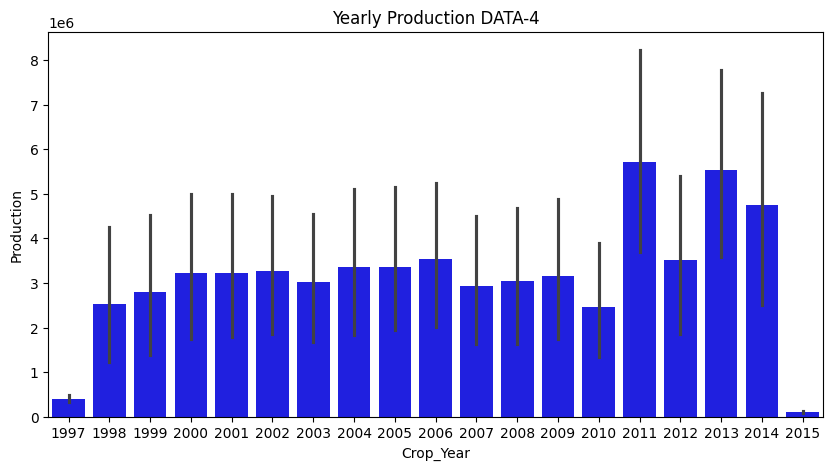

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data = df4, x = 'Crop_Year', y= 'Production', color = 'blue')
plt.title("Yearly Production DATA-4")

Text(0.5, 1.0, 'Yearly Production Area DATA-4')

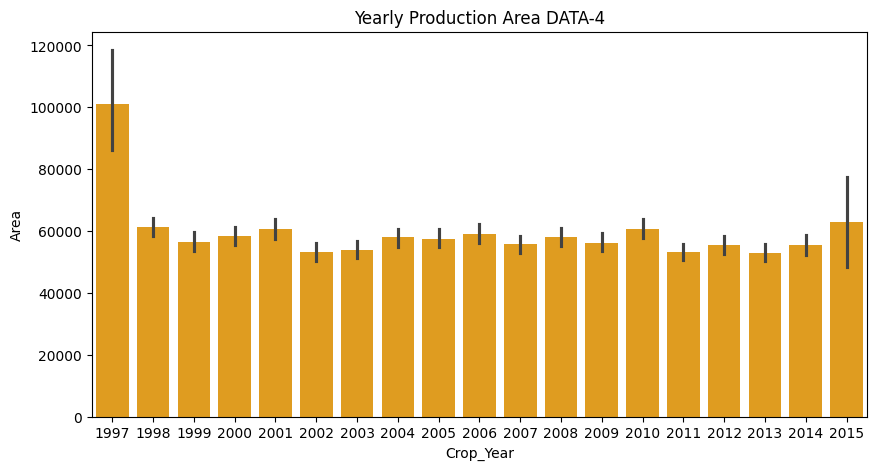

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data = df4, x = 'Crop_Year', y= 'Area', color = 'orange')
plt.title("Yearly Production Area DATA-4")

df4 is outliers data but in this analysis outliers are highly important because there is much data and they in actual contribute production equally to left data.

We observe there is no independent relation between production area and production and especially 1997 and 2015 are compltely abnormal so to clearly understand relation it is better to compare contributions by dividing based on season, crop and area, so that we can understand if any season is risky for any crop or any crop has failed in any year.   

In [ ]:
df5 = df                                ### complete data nulls filled with median
df5['Production'] = df["Production"].fillna(med)
df5['P/A'] = df5["P/A"].fillna(df['Area']/df['Production'])
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     246091 non-null  float64
 7   P/A            246091 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 15.0+ MB


Text(0.5, 1.0, 'Yearly Production DATA-5')

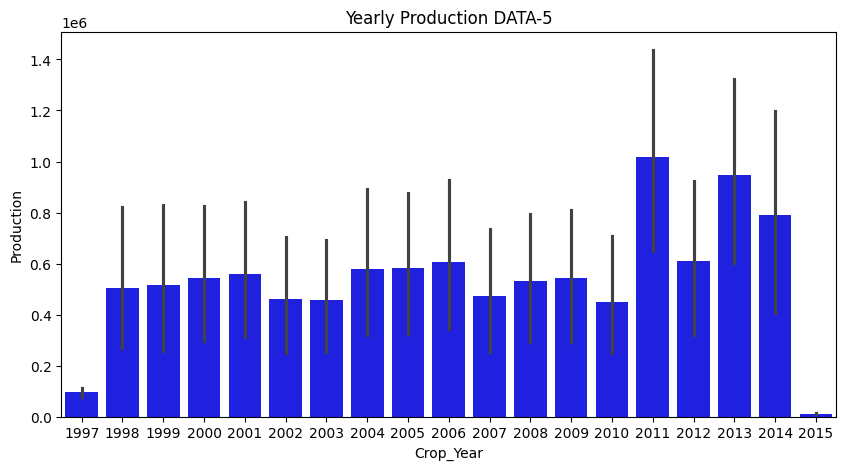

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data = df5, x = 'Crop_Year', y= 'Production', color = 'blue')
plt.title("Yearly Production DATA-5")

Text(0.5, 1.0, 'Yearly Production Area DATA-4')

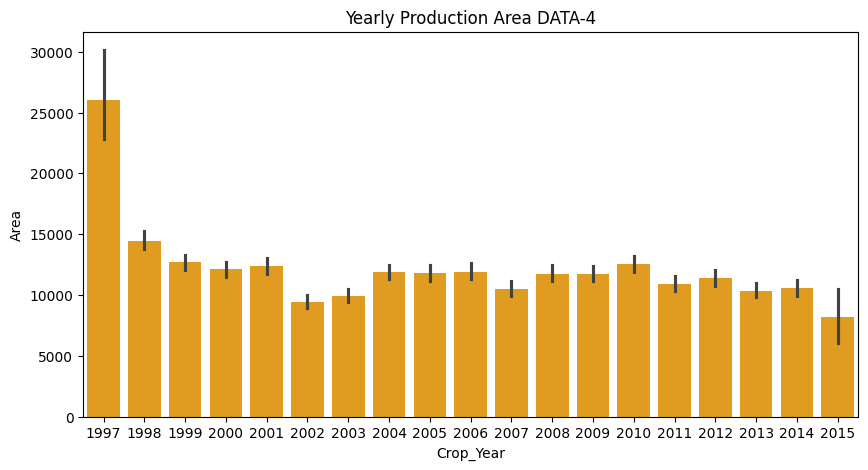

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data = df5, x = 'Crop_Year', y= 'Area', color = 'orange')
plt.title("Yearly Production Area DATA-4")

In [ ]:
list3 = ['Area', 'Production']
gp_df1 = df5.groupby(['Crop_Year','Season','Crop'])[list3].sum()
gp_df1 = gp_df1.reset_index()
gp_df1

,Crop_Year,Season,Crop,Area,Production
0,1997,Autumn,Arhar/Tur,25621.0,6487.0
1,1997,Autumn,Groundnut,37462.0,34433.0
2,1997,Autumn,Jute,92010.0,123210.0
3,1997,Autumn,Maize,51370.0,83026.0
4,1997,Autumn,Paddy,827162.0,812852.0
...,...,...,...,...,...
2824,2015,Winter,Rapeseed &Mustard,7308.0,1496.6
2825,2015,Winter,Rice,3167000.0,4702000.0
2826,2015,Winter,Sesamum,12434.0,2298.4
2827,2015,Winter,Sugarcane,8962.0,577157.2


In [ ]:
gp_df2 = df5.groupby(['Crop','Crop_Year'])[list3].sum()
gp_df2 = gp_df2.reset_index()
gp_df2

,Crop,Crop_Year,Area,Production
0,Apple,2002,4.0,0.0
1,Apple,2003,5.0,0.0
2,Arcanut (Processed),2002,144116.0,192831.0
3,Arecanut,1997,260686.0,308584.0
4,Arecanut,1998,264033.0,797811.0
...,...,...,...,...
1182,other oilseeds,2010,1300390.0,524730.0
1183,other oilseeds,2011,126563.0,1094233.0
1184,other oilseeds,2012,847.0,740.0
1185,other oilseeds,2013,110748.0,1309777.0


In [ ]:
df3.to_csv("CropData_No_Outliers")
df4.to_csv("CropData_Outliers")
df5.to_csv("CropData_Complete")

In [ ]:
gp_df1.to_csv("Grouped Data_Seasonal")
gp_df2.to_csv("Grouped Data_Crop")

In [ ]:
gp_df3 = df5.groupby(['State_Name', 'District_Name','Crop'])[list3].sum()
gp_df3 = gp_df3.reset_index()
gp_df3

,State_Name,District_Name,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,8927.37,1.091945e+04
1,Andaman and Nicobar Islands,NICOBARS,Banana,1534.42,9.069120e+03
2,Andaman and Nicobar Islands,NICOBARS,Black pepper,309.66,5.450000e+01
3,Andaman and Nicobar Islands,NICOBARS,Cashewnut,5459.00,1.372830e+03
4,Andaman and Nicobar Islands,NICOBARS,Coconut,134072.01,5.006800e+08
...,...,...,...,...,...
22671,West Bengal,PURULIA,Sunflower,1004.00,1.133000e+03
22672,West Bengal,PURULIA,Tobacco,72.00,1.900000e+01
22673,West Bengal,PURULIA,Turmeric,3009.00,1.871000e+03
22674,West Bengal,PURULIA,Urad,210932.00,7.695700e+04


In [ ]:
gp_df3.to_csv("Grouped Data_States")